# Auxiliar 5: Búsqueda de Línea

*Por: Benjamín Vera*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Gráfico del método de descenso

Considere la función cuadrática siguiente:
$$f(x) = \frac{1}{2} x^\top Q x - b^\top x$$
En el auxiliar se obtuvo la iteración de descenso con búsqueda de línea exacta dada por
$$x_{k+1} = x_k -  \frac{\nabla f(x_k)^\top \nabla f(x_k)}{\nabla f(x_k) \top Q \nabla f(x_k)} \nabla f(x_k)$$
En que $\nabla f(x_k) = Q x_k - b$. Implemente este método y grafique su evolución en un ejemplo adecuado. Construya además un registro de los valores $E(x_k) = \frac{1}{2} (x_k - x^*)^\top Q (x_k - x^*)$ a ser utilizado en el siguiente ítem.

In [2]:
# Define the quadratic function and its gradient
def f(x, Q, b):
    return 0.5 * x.T @ Q @ x - b.T @ x

def grad_f(x, Q, b):
    return Q @ x - b

# Define weighted proximity
def proximity(x, x_star, Q):
    return 0.5 * (x - x_star).T @ Q @ (x - x_star)

# Steepest Descent with Exact Line Search
def steepest_descent(Q, b, x0, x_star, tol=1e-8, max_iter=500):
    xk = x0
    trajectory = [xk.copy()]
    proximity_vals = [proximity(xk, x_star, Q)]
    
    for _ in range(max_iter):
        grad = grad_f(xk, Q, b)
        grad_norm = np.linalg.norm(grad)
        
        if grad_norm < tol:
            break
        
        alpha_k = (grad.T @ grad) / (grad.T @ Q @ grad)
        xk = xk - alpha_k * grad
        trajectory.append(xk.copy())
        proximity_vals.append(proximity(xk, x_star, Q))
    
    return np.array(trajectory), np.array(proximity_vals)

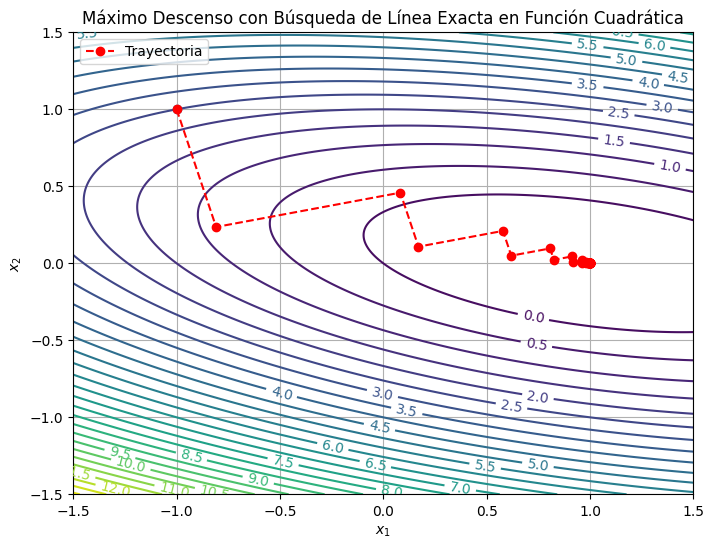

In [3]:
# Set up the problem
Q = np.array([[1, 1], [1, 6]])  # Symmetric positive definite
b = np.array([1, 1])
x0 = np.array([-1.0, 1.0])       # Starting point

x_star = np.linalg.solve(Q, b)   # Exact solution

# Run the method
trajectory, proximity_values = steepest_descent(Q, b, x0, x_star)

# Plotting
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (Q[0,0]*X**2 + 2*Q[0,1]*X*Y + Q[1,1]*Y**2) - b[0]*X - b[1]*Y

plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=30)
plt.clabel(contours)
plt.plot(trajectory[:,0], trajectory[:,1], 'ro--', label='Trayectoria')
plt.scatter(trajectory[0,0], trajectory[0,1])
plt.scatter(trajectory[-1,0], trajectory[-1,1])
plt.legend(loc="upper left")
plt.title('Máximo Descenso con Búsqueda de Línea Exacta en Función Cuadrática')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

## 2. Evolución de la distancia al óptimo

En el auxiliar se probó la cota de convergencia lineal
$$E(x_{k+1}) \leq \left( \frac{\lambda_n - \lambda_1}{\lambda_n + \lambda_1} \right)^2 E(x_k)$$
De donde
$$E(x_k) \leq \left( \frac{\lambda_n - \lambda_1}{\lambda_n + \lambda_1} \right)^{2k} E(x_0)$$
Dados varios puntos iniciales $x_0$ tales que $E(x_0) = 1$, grafique las trayectorias $E(x_k)$ en comparación con la cota teórica.

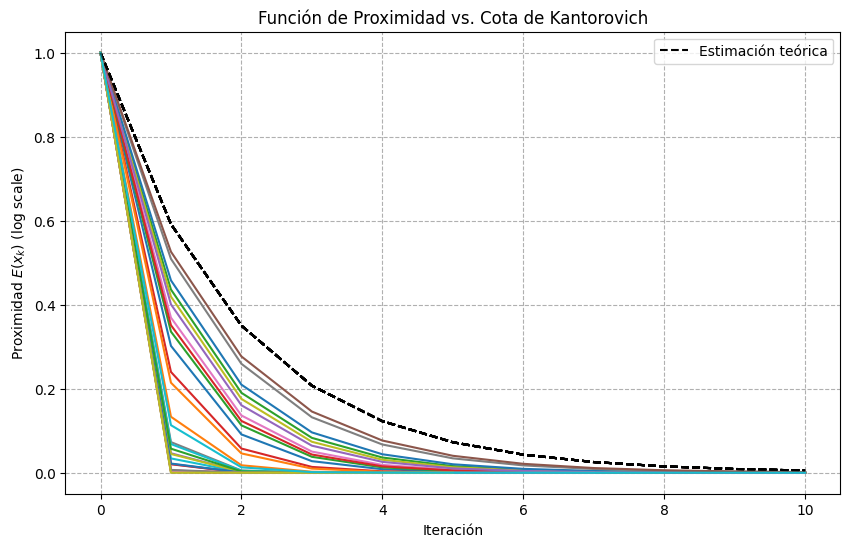

In [ ]:
# Eigenvalues for Kantorovich inequality
eigenvalues = np.linalg.eigvalsh(Q)
lambda_min = eigenvalues[0]
lambda_max = eigenvalues[-1]
rho = ((lambda_max - lambda_min) / (lambda_max + lambda_min))**2

# Generate several starting points with the same initial proximity
n_starts = 30
E0 = 1.0  # Desired initial proximity

start_points = []
np.random.seed(0)
for _ in range(n_starts):
    random_dir = np.random.randn(2)
    random_dir /= np.linalg.norm(random_dir)  # Normalize
    # Solve for x0 such that E(x0) = E0
    shift = np.sqrt(2 * E0 / (random_dir.T @ Q @ random_dir))
    x0 = x_star + shift * random_dir
    start_points.append(x0)

# Solve for each starting point and plot
plt.figure(figsize=(10, 6))

for i, x0 in enumerate(start_points):
    traj, prox_vals = steepest_descent(Q, b, x0, x_star, max_iter=10)
    steps = np.arange(len(prox_vals))
    worst_case = E0 * (rho**steps)
    
    plt.plot(steps, prox_vals)
    plt.plot(steps, worst_case, 'k--', alpha=0.5 if i > 0 else 1.0, label='Estimación teórica' if i == 0 else "")

plt.xlabel('Iteración')
plt.ylabel('Proximidad $E(x_k)$ (log scale)')
plt.title('Función de Proximidad vs. Cota de Kantorovich')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()